In [74]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Carregar o arquivo Datasets
df_colesterol = pd.read_csv("./datasets/dataset_colesterol.csv")

In [76]:
# Checar arquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [77]:
# Remover coluna Id
df_colesterol.drop(columns=["Id"], axis=1, inplace=True)

In [78]:
# Renomear Colunas
df_colesterol.columns = [
    "grupo_sanguinio",
    "fumante",
    "nivel_atividade_fisica",
    "idade",
    "peso",
    "altura",
    "nivel_colesterol",
]

In [79]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [80]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

### EDA

In [81]:
df_colesterol_eda.head(10)

,grupo_sanguinio,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [82]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [83]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguinio           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [84]:
# Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [85]:
# Coletar medidas das variáveis categóricas
moda_grupo_sang = df_colesterol_eda.grupo_sanguinio.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [86]:
# Coletar medidas das variáveis numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [87]:
# Inputar valores ausentes
df_colesterol_eda.fillna(
    value={
        "grupo_sanguinio": moda_grupo_sang[0],
        "fumante": moda_fumante[0],
        "nivel_atividade_fisica": moda_nivel_atividade[0],
        "idade": mediana_idade,
        "peso": mediana_peso,
        "altura": mediana_altura,
    },
    inplace=True,
)

In [88]:
# Converter idade e altura para inteiro (int)
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [89]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguinio         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [90]:
# Visualizar os Dados
df_colesterol_eda.head(10)

,grupo_sanguinio,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

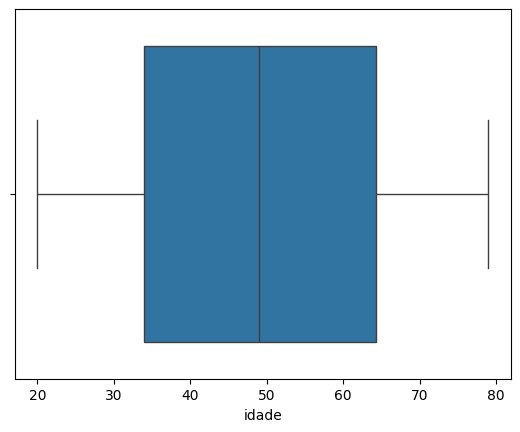

In [91]:
# Verificar / detectar outliers
sns.boxplot(data=df_colesterol_eda, x="idade")

<Axes: xlabel='peso'>

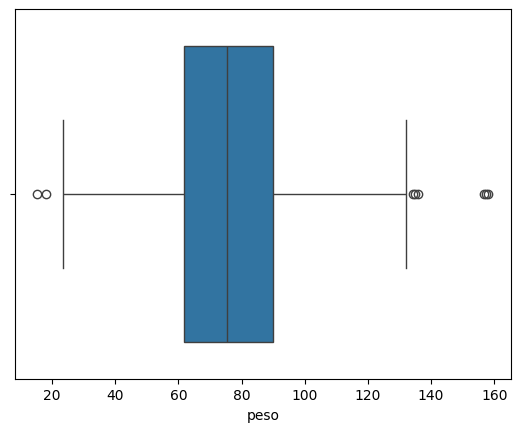

In [92]:
sns.boxplot(data=df_colesterol_eda, x="peso")

<Axes: xlabel='altura'>

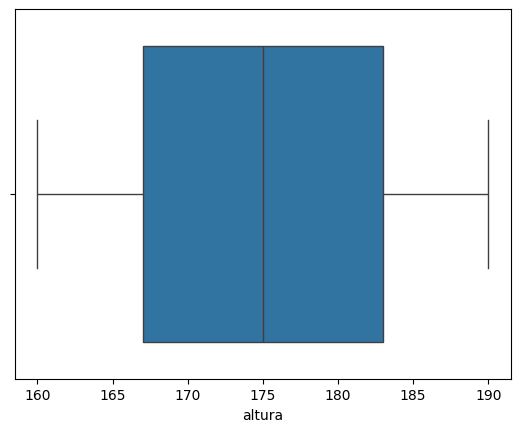

In [93]:
sns.boxplot(data=df_colesterol_eda, x="altura")

In [94]:
# Filtrar o público para ser removido
df_colesterol_eda[df_colesterol_eda["peso"] < 40].peso.count()

37

In [95]:
# Remover público do Dataframe
df_colesterol_eda.drop(
    df_colesterol_eda[df_colesterol_eda["peso"] < 40].index, axis=0, inplace=True
)

<Axes: xlabel='nivel_colesterol'>

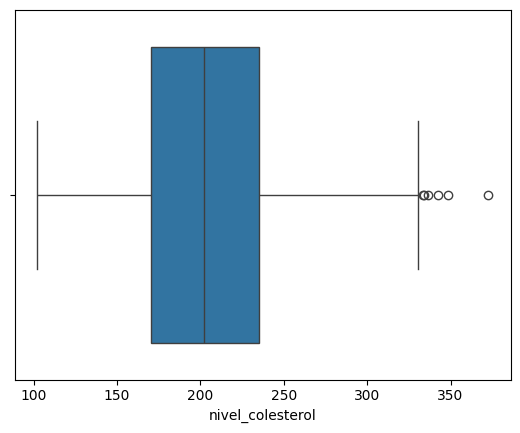

In [96]:
sns.boxplot(data=df_colesterol_eda, x="nivel_colesterol")

<Axes: xlabel='grupo_sanguinio', ylabel='nivel_colesterol'>

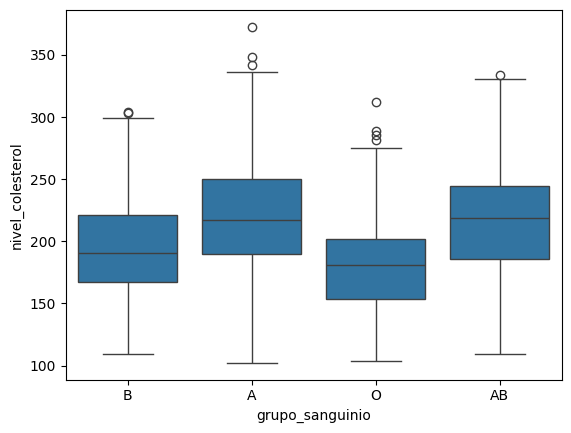

In [97]:
# Cruzamentos de Variáveis Categóricas com Nível Colesterol
sns.boxplot(data=df_colesterol_eda, x="grupo_sanguinio", y="nivel_colesterol")

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

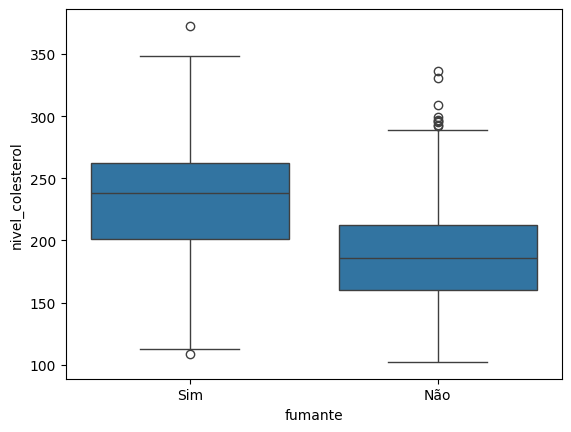

In [98]:
# Cruzamentos de Variáveis Categóricas com Nível Colesterol
sns.boxplot(data=df_colesterol_eda, x="fumante", y="nivel_colesterol")

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

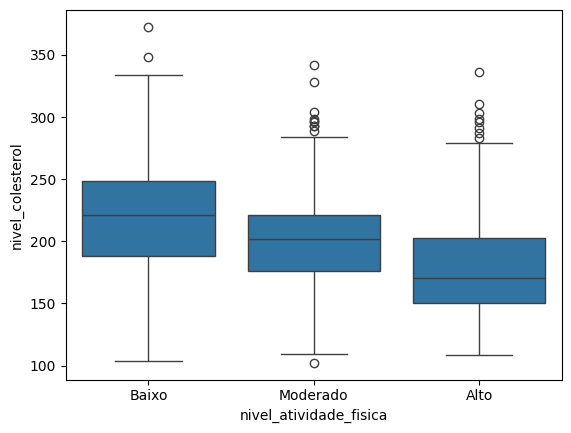

In [99]:
# Cruzamentos de Variáveis Categóricas com Nível Colesterol
sns.boxplot(data=df_colesterol_eda, x="nivel_atividade_fisica", y="nivel_colesterol")

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

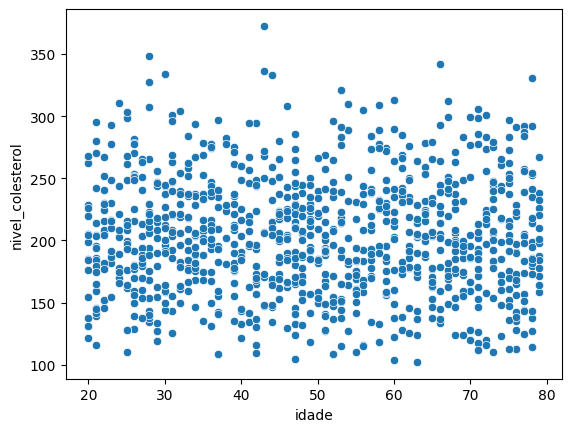

In [100]:
# Cruzamentos variáveis numéricas com nível de colesterol
sns.scatterplot(data=df_colesterol_eda, x="idade", y="nivel_colesterol")

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

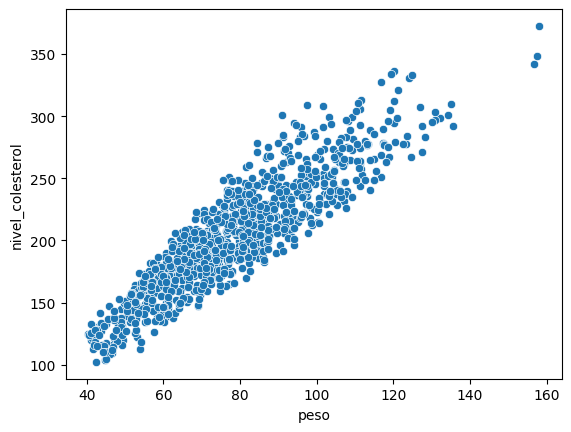

In [101]:
# Cruzamentos variáveis numéricas com nível de colesterol
sns.scatterplot(data=df_colesterol_eda, x="peso", y="nivel_colesterol")

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

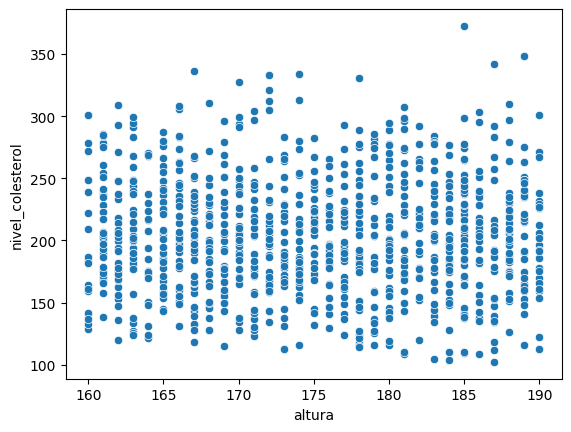

In [102]:
# Cruzamentos variáveis numéricas com nível de colesterol
sns.scatterplot(data=df_colesterol_eda, x="altura", y="nivel_colesterol")

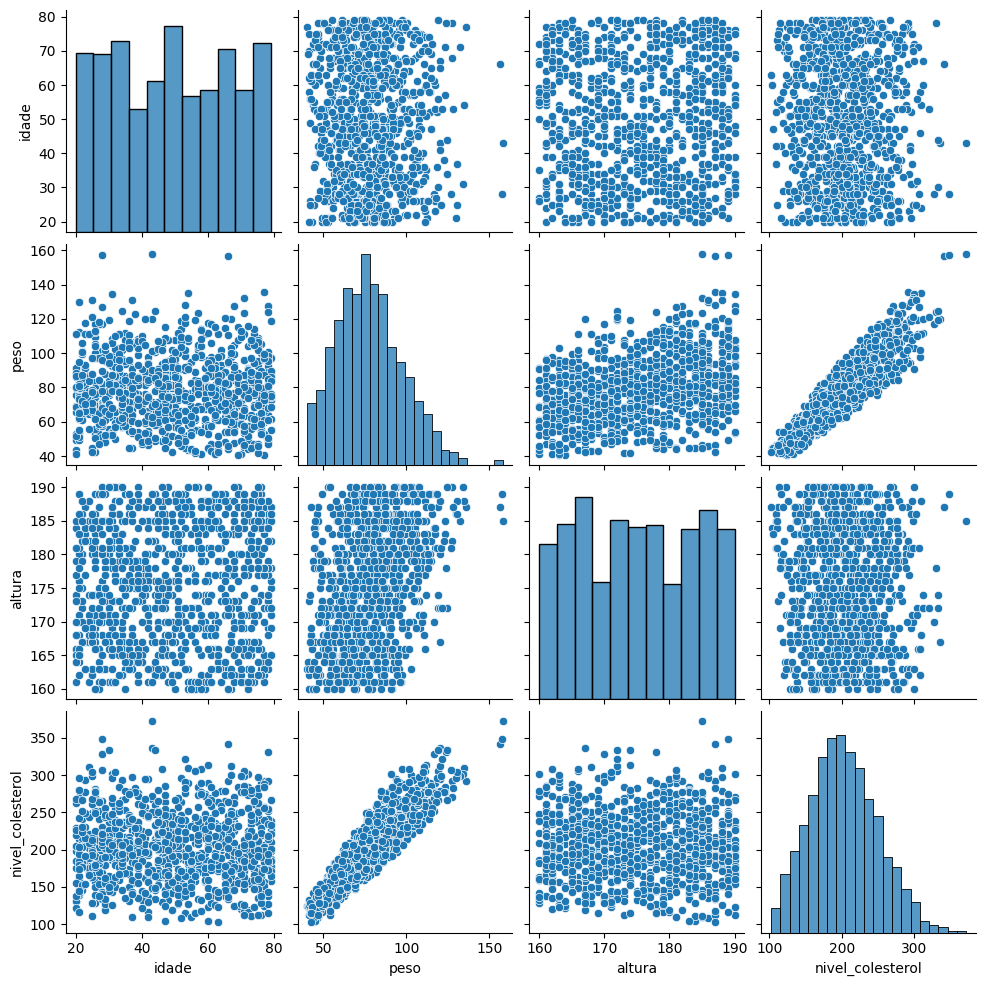

In [103]:
sns.pairplot(df_colesterol_eda)

In [104]:
# Converter variáveis categóricas nominais em numéricas, utilizando One-Hot Encoder do Pandas.
df_colesterol_eda = pd.get_dummies(
    df_colesterol_eda, columns=["grupo_sanguinio", "fumante"], dtype="int64"
)

In [105]:
df_colesterol_eda.head(10)

,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,grupo_sanguinio_A,grupo_sanguinio_AB,grupo_sanguinio_B,grupo_sanguinio_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [106]:
# Converter variável categorica ordinal em numérica, usando factorize do Pandas

df_colesterol_eda["nivel_atividade_fisica"] = (
    pd.factorize(df_colesterol_eda.nivel_atividade_fisica)[0] + 1
)

<Axes: >

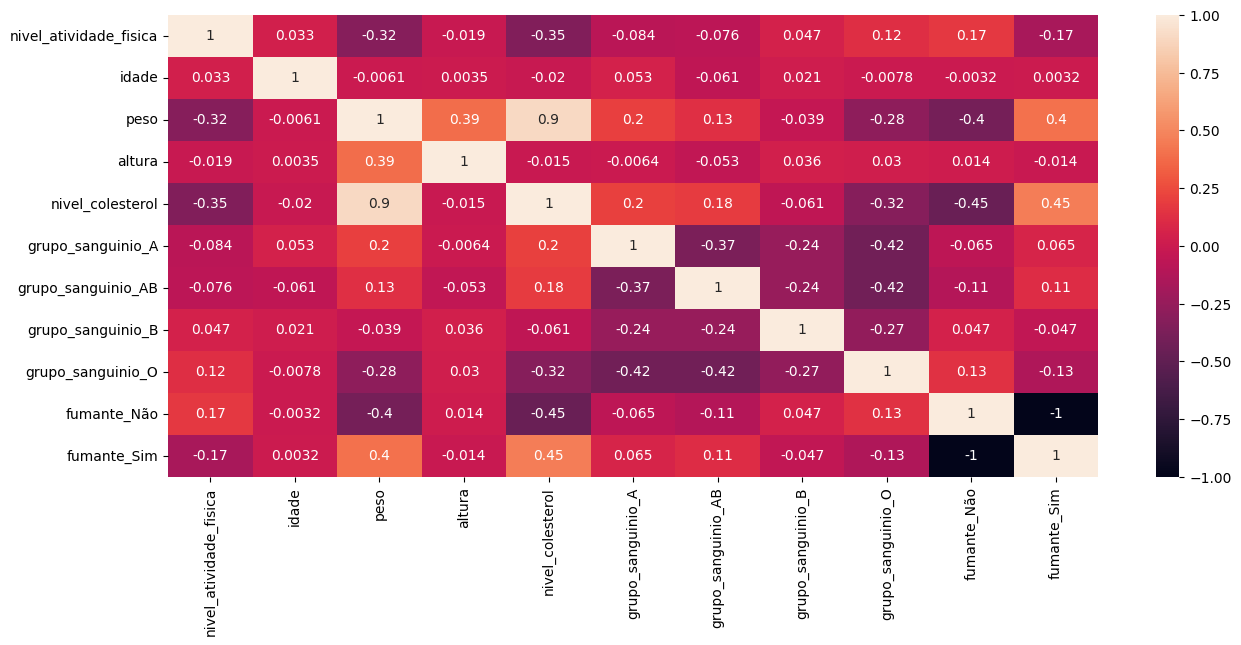

In [107]:
# Mapa de calor com Correlação entre as variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

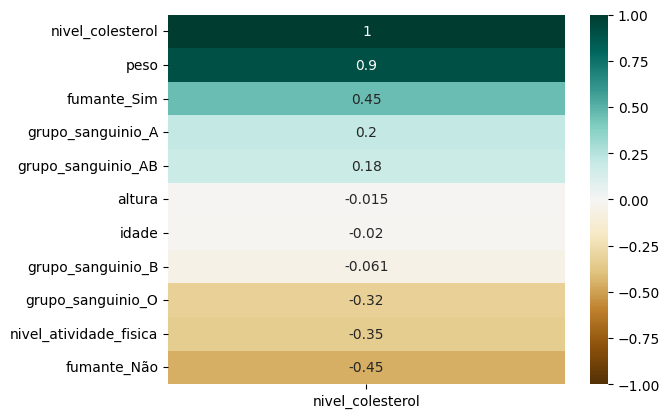

In [108]:
# Formato de Ranking, somente correlação com a variável target (nivel_colesterol)

sns.heatmap(
    df_colesterol_eda.corr()[["nivel_colesterol"]].sort_values(
        by="nivel_colesterol", ascending=False
    ),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
)

In [109]:
# Bucketing de Idade
# Variável idade de 20 - 79
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
df_colesterol_bucketing["escala_idade"] = pd.cut(
    x=df_colesterol_bucketing["idade"],
    bins=bins_idade,
    labels=labels_idade,
    include_lowest=True,
)

In [110]:
df_colesterol_bucketing.head(10)

,grupo_sanguinio,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol,escala_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escala_idade', ylabel='nivel_colesterol'>

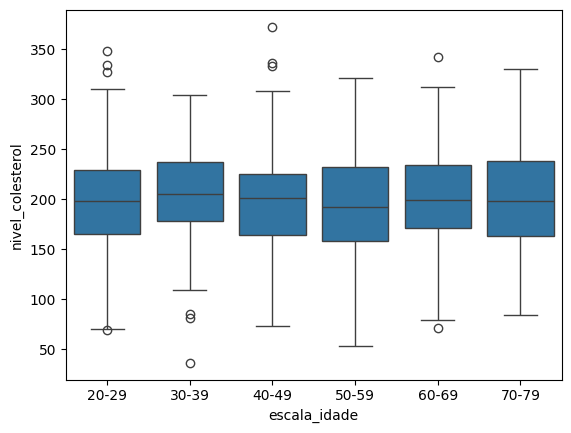

In [111]:
sns.boxplot(df_colesterol_bucketing, x="escala_idade", y="nivel_colesterol")

In [112]:
# Bucketing de Peso

bins_peso = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
labels_peso = [
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100-109",
    "110-119",
    "120-129",
    "130-139",
    "140-149",
    "150-159",
]
df_colesterol_bucketing["escala_peso"] = pd.cut(
    x=df_colesterol_bucketing["peso"],
    bins=bins_idade,
    labels=labels_idade,
    include_lowest=True,
)

<Axes: xlabel='escala_peso', ylabel='nivel_colesterol'>

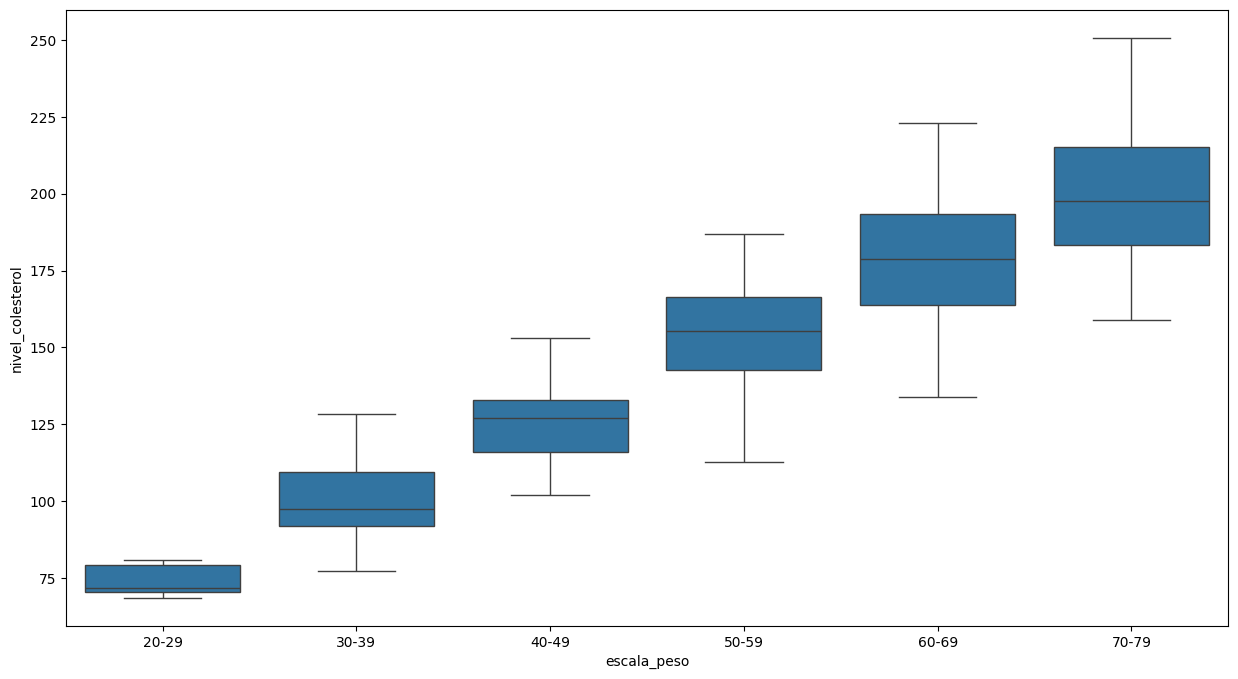

In [113]:
plt.figure(figsize=(15, 8))
sns.boxplot(df_colesterol_bucketing, x="escala_peso", y="nivel_colesterol")

## Criar Dataset de Treino e Teste

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [115]:
df_colesterol.drop(
    df_colesterol[df_colesterol["peso"] < 40].index, axis=0, inplace=True
)

In [116]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguinio         960 non-null    object 
 1   fumante                 960 non-null    object 
 2   nivel_atividade_fisica  959 non-null    object 
 3   idade                   960 non-null    float64
 4   peso                    960 non-null    float64
 5   altura                  960 non-null    float64
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [117]:
x = df_colesterol.drop(columns="nivel_colesterol", axis=1)
y = df_colesterol["nivel_colesterol"]

In [118]:
# Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=51
)

In [119]:
x_test.shape

(289, 6)

In [120]:
# Pipeline
# Imputar moda nas variáveis categóricas - grupo_sanguinio, fumante, nivel_atividade_fisica
# Padronizar variáveis numéricas - idade, peso, altura
# OneHotEncode nas variáveis categóricas nominais - grupo_sanguinio, fumante
# OrdinalEncoder nas variáveis categóricas ordinais - nivel_atividade_fisica
# Imputar mediana nas variáveis numéricas - idade, peso , altura

# Nomes da Colunas
colunas_categoricas = ["grupo_sanguinio", "fumante"]
colunas_numericas = ["idade", "peso", "altura"]
colunas_ordinais = ["nivel_atividade_fisica"]

In [121]:
# Criar um Transformer Categóricas
transformer_categorias = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

In [122]:
# Criar um Transformer Ordinais
transformer_ordinais = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        (
            "ordinal",
            OrdinalEncoder(
                categories=[["Baixo", "Moderado", "Alto"]], handle_unknown="error"
            ),
        ),
    ]
)

In [123]:
# Criar um Transformer Numérico
transformer_numericas = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

In [124]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ("num", transformer_numericas, colunas_numericas),
        ("cat", transformer_categorias, colunas_categoricas),
        ("ord", transformer_ordinais, colunas_ordinais),
    ]
)

In [125]:
# Criando o Pipeline principal = Pre Processamento + Treinamento
model_regr = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

In [126]:
# Treinar Modelo
model_regr.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'peso', 'altura']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguinio',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivel_atividade_fisica'])])),
                ('regressor', LinearRegression())])

## Análise de Métricas

In [127]:
# Gerar a Predição
y_pred = model_regr.predict(x_test)

In [128]:
# Calcular R2 Score
# Lembrando que quanto mais próximo do 1 melhor.
r2_score(y_test, y_pred)

0.9594250724093465

In [129]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

7.313838031022503

In [130]:
# Calcular o RMSE (Root Mean Absolute Error)
mean_squared_error(y_test, y_pred, squared=False)

9.097649246487032

## Análise de Resíduos

In [131]:
# Calcular os Resíduos
residuos = y_test - y_pred

In [132]:
# Transformar o Resíduos na escala padrão
# (x - média) / desvio_padrão
# Temos uma função pronta dentro do scipy que faz isso.
from scipy.stats import zscore

residuos_std = zscore(residuos)

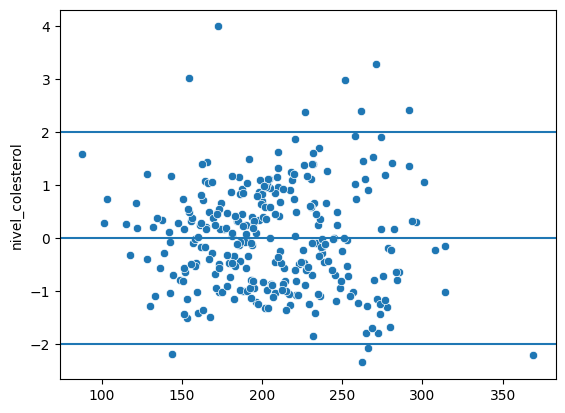

In [133]:
# Verificar linearidade dos residuos: Valores estão entre -2 e +2 (Escala padrão)
# Verificar homoscedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

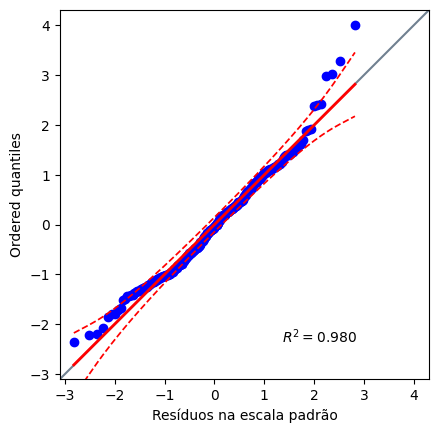

In [134]:
# Checar se residuos seguem uma distribuição normal
# QQ Plot
import pingouin as pg

pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.xlabel("Resíduos na escala padrão")
plt.show()

In [135]:
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [136]:
# Teste de Normalidade de Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatística do Teste: {} e P-Value: {}".format(stat_shapiro, p_value_shapiro))

Estatística do Teste: 0.9807736277580261 e P-Value: 0.000626839988399297


In [137]:
# Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, "norm")
print("Estatística do Teste: {} e P-Value: {}".format(stat_ks, p_value_ks))

Estatística do Teste: 0.4245592099848544 e P-Value: 8.925833190918416e-48


In [138]:
# Teste de Lillliefors
stat_ll, p_value_ll = lilliefors(residuos, dist="norm", pvalmethod="table")
print("Estatística do Teste: {} e P-Value: {}".format(stat_ll, p_value_ll))

Estatística do Teste: 0.04955371030192923 e P-Value: 0.12533323720735612


In [143]:
# Teste de Anderson-Darling
stat_and, critical_and, significance_and = anderson(residuos, dist="norm")

In [140]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [141]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [142]:
print("Estatística do Teste: {} e Valor Crítico: {}".format(stat_and, critical_and[2]))

Estatística do Teste: 0.9169275158490109 e Valor Crítico: 0.776


In [144]:
# Teste de Homoscedasticidade de Goldfeld-Quandt dos Resíduos
pipe = Pipeline(steps=[("preprocessor", preprocessor)])
x_test_transformed = pipe.fit_transform(x_test)

In [145]:
x_test_transformed

array([[-1.44340738,  0.22608781, -0.58669129, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28157488, -1.20886474, -1.05685776, ...,  1.        ,
         0.        ,  0.        ],
       [-1.10973608, -0.84754575, -0.35160806, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.00250157, -1.09014564, -1.52702423, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.28056099,  0.17447081, -0.35160806, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.72545605, -1.65277092, -1.17439938, ...,  0.        ,
         1.        ,  0.        ]])

In [146]:
test_goldfeld = het_goldfeldquandt(residuos, x_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print(
    "Estatística do Teste: {} e o P-Value: {}".format(stat_goldfeld, p_value_goldfeld)
)

Estatística do Teste: 0.6716135765253545 e o P-Value: 0.9893959472385482


## Realizar Predições Individuais

In [155]:
predicao_individual = {
    "grupo_sanguinio": "O",
    "fumante": "Não",
    "nivel_atividade_fisica": "Alto",
    "idade": 37,
    "peso": 75,
    "altura": 180,
}
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [156]:
sample_df

,grupo_sanguinio,fumante,nivel_atividade_fisica,idade,peso,altura
1,O,Não,Baixo,39,85,170


In [157]:
# Predição
model_regr.predict(sample_df)

array([228.45922184])

In [158]:
import joblib

In [159]:
# Salvar Modelo
joblib.dump(model_regr, "./modelo_colesterol.pkl")

['./modelo_colesterol.pkl']